In [4]:
import pandas as pd 

In [5]:

df = pd.read_csv('PRODUCT SALES.csv.zip')

In [6]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Age_Group_NUMBER', 'Customer_Gender', 'Country', 'Product_Category',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

In [7]:
df.describe()

,Day,Year,Customer_Age,Age_Group_NUMBER,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.0,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2019.520153,35.919212,1.0,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
std,8.781567,1.179704,11.021936,0.0,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934
min,1.000000,2017.000000,17.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,8.000000,2019.000000,28.000000,1.0,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,16.000000,2019.500000,35.000000,1.0,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,23.000000,2021.000000,43.000000,1.0,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,31.000000,2021.000000,87.000000,1.0,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000


In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [9]:
mean_data = np.mean(df['Customer_Age'])
stdev_data = np.std(df['Customer_Age'])

In [10]:
mean_data

35.91921157861212

In [11]:
stdev_data

11.021886869480573

(array([14788., 24962., 27568., 21038., 13286.,  7914.,  2946.,   334.,
          130.,    70.]),
 array([17., 24., 31., 38., 45., 52., 59., 66., 73., 80., 87.]),
 <BarContainer object of 10 artists>)

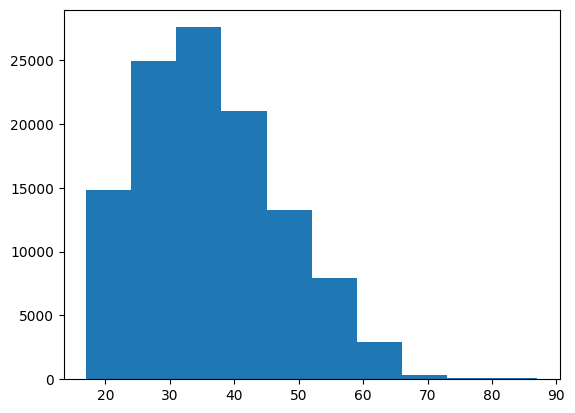

In [12]:
plt.hist(df.Customer_Age)

In [13]:
df['Product_Category'].value_counts() #it will count how many values we have from each category inside Product Category

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

In [14]:
df['Product_Category'].unique() #will return us the unique values of that columns

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [15]:
#Getting the profit = getting some values based on other values
profit_female = df[df['Customer_Gender'] == 'F']['Profit']
profit_male = df[df['Customer_Gender'] == 'M']['Profit']

stats.ttest_ind(profit_female, profit_male)


TtestResult(statistic=2.4913922626943656, pvalue=0.012725777563722436, df=113034.0)

## Know the profit from different countries

In [16]:
df.Country.value_counts()

Country
United States     39206
Australia         23936
canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

In [17]:
profit_France = df[df['Country'] == 'France']['Profit']
profit_Canada = df[df['Country'] == 'canada']['Profit']
profit_Australia = df[df['Country'] == 'Australia']['Profit']
profit_US = df[df['Country'] == 'United States']['Profit']
profit_UK = df[df['Country'] == 'United Kingdom']['Profit']
profit_Germany = df[df['Country'] == 'Germany']['Profit']


Hypothesis Testing to see if profits are similar:

In [18]:

stats.f_oneway(profit_Australia, profit_Canada, profit_France, profit_Germany, profit_UK, profit_US)

F_onewayResult(statistic=196.06289744987376, pvalue=8.970606044577626e-209)

We reject the null hypothesis. The profits differenciate from each country

## Know the profits from the different age groups

In [19]:
df['Age_Group'].unique()

array(['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)',
       'Seniors (64+)'], dtype=object)

In [20]:
df[['Age_Group', 'Customer_Age']]

,Age_Group,Customer_Age
0,Youth (<25),17
1,Youth (<25),23
2,Young Adults (25-34),33
3,Adults (35-64),39
4,Adults (35-64),42
...,...,...
113031,Adults (35-64),52
113032,Young Adults (25-34),25
113033,Young Adults (25-34),26
113034,Young Adults (25-34),33


In [21]:
Profit_Youth = df[df['Age_Group'] == 'Youth (<25)']['Profit']
Profit_Young_Adults = df[df['Age_Group'] == 'Young Adults (25-34)']['Profit']
Profit_Adults = df[df['Age_Group'] == 'Adults (35-64)']['Profit']
Profit_Seniors = df[df['Age_Group'] == 'Seniors (64+)']['Profit']

stats.f_oneway(Profit_Adults, Profit_Seniors, Profit_Young_Adults, Profit_Youth)

F_onewayResult(statistic=57.568064925295715, pvalue=3.5410961589774692e-37)

We reject the null hypothesis

In [22]:
import matplotlib.pyplot as plt

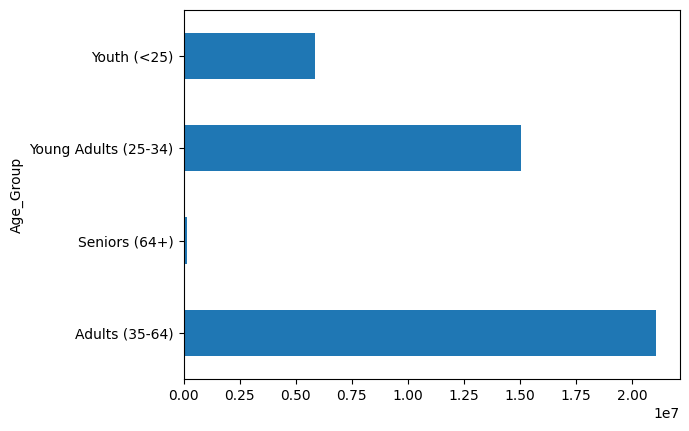

In [33]:
Plotting_profit = df.groupby('Age_Group')['Profit'].sum().plot.barh()


In [34]:
df.groupby('Age_Group')['Profit'].sum()

Age_Group
Adults (35-64)          21061305.0
Seniors (64+)             169823.0
Young Adults (25-34)    15042052.0
Youth (<25)              5853230.0
Name: Profit, dtype: float64